In [77]:
## NOTE: https://www.thetransportpolitic.com/transitexplorer/#6/38.625/-78.673
##https://python-overpy.readthedocs.io/en/latest/example.html
###Preliminary install Code

#conda install -c conda-forge overpy

###Running
##import overpy


In [78]:
#api = overpy.Overpass()

####Note just moved to get and request because easier to implement

import requests
import json

####Look to bottom for Start Here

In [117]:
railway_types=[
'rail',
'subway',
'light_rail',#Full-sized passenger or freight trains in the standard gauge for the country or state. See also Key:usage to properly distinguish between, for example, usage=main, usage=branch and usage=industrial. (Also, usage=tourism and usage=military).
"tram", #subway - A large city- to suburban-scale passenger rail service running mostly grade separated (see Wikipedia:rapid transit), often fully and at least partially underground. Overlaps somewhat with "metro" (passenger rail) and/or "rapid transit."
"narrow_gauge",
"monorail",
"miniature",
"funicular"]

#for i in railway_types[0:1]:
#    print(i)

bound_box1='''way["poly"="38.511, -77.811, 39.711, -76.111"];'''

for i in railway_types[3:4]:
    way1 = '''way["railway"="'''+i+'''"];'''

closing="out;"

query1=bound_box1+closing
print(query1)

way["poly"="38.511, -77.811, 39.711, -76.111"];out;


In [118]:
result = api.query(query1)

In [119]:
result

0

0

0

In [123]:
result.ways

[]

In [124]:
####Start Here

import requests
import json


In [147]:
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
(node["railway"="{0}"](38.511, -77.811, 39.711, -76.111);
 way["railway"="{0}"](38.511, -77.811, 39.711, -76.111);
 rel["railway"="{0}"](38.511, -77.811, 39.711, -76.111);
);
out center;
""".format(railway_types[1])

overpass_query 

'\n[out:json];\n(node["railway"="subway"](38.511, -77.811, 39.711, -76.111);\n way["railway"="subway"](38.511, -77.811, 39.711, -76.111);\n rel["railway"="subway"](38.511, -77.811, 39.711, -76.111);\n);\nout center;\n'

In [148]:
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()
#data

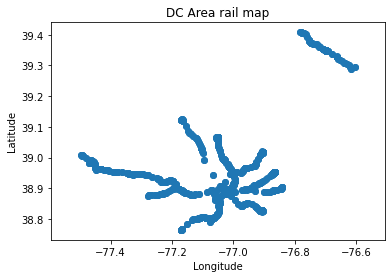

In [149]:
import numpy as np
import matplotlib.pyplot as plt

# Collect coords into list
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))

# Convert coordinates into numpy array
X = np.array(coords)

plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('DC Area rail map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()